In [234]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd

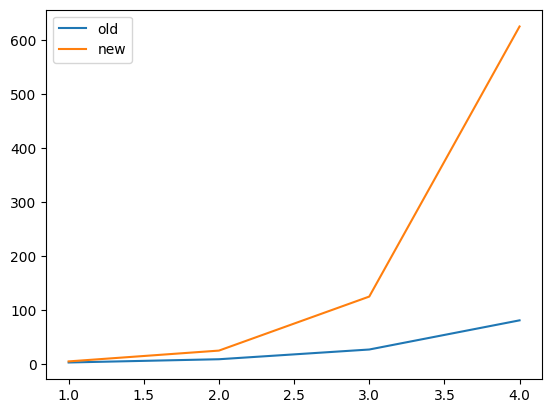

In [235]:
epsilon=0.5
n=np.arange(1,5,1)
y=(1+1/epsilon)**n
z=(1+2/epsilon)**(n)
plt.plot(n,y,label='old')
plt.plot(n,z,label='new')
plt.legend()

In [254]:
class Enet:
    def __init__(self,dim,epsilon=0.5):
        self.dim = dim
        self.epsilon = epsilon
        
    def generate_epsilon_net3D(self):
        """
        Generate an epsilon-net on a unit sphere in 3D.

        Parameters:
            epsilon (float): The maximum allowable distance between any point
                            on the sphere and the closest point in the epsilon-net.

        Returns:
            np.ndarray: An array of points representing the epsilon-net on the unit sphere.
        """
        # Calculate the number of divisions required based on epsilon
        num_latitude = int(np.pi / self.epsilon) + 1  # Number of latitude lines
        num_longitude = int(2 * np.pi / self.epsilon)  # Number of longitude lines

        points = []

        for i in range(num_latitude + 1):
            # Latitude angle: from 0 to pi
            theta = i * np.pi / num_latitude

            for j in range(num_longitude):
                # Longitude angle: from 0 to 2*pi
                phi = j * 2 * np.pi / num_longitude

                # Convert spherical coordinates to Cartesian coordinates
                x = np.sin(theta) * np.cos(phi)
                y = np.sin(theta) * np.sin(phi)
                z = np.cos(theta)

                points.append([x, y, z])
        print(f"Generated epsilon-net with {len(points)} points.")
        return np.array(points)

    def generate_epsilon_net(self):
        """
        Generate an epsilon-net on an n-dimensional unit sphere.

        Parameters:
            n (int): The dimensionality of the unit sphere.
            epsilon (float): The maximum allowable distance between any point
                            on the sphere and the closest point in the epsilon-net.

        Returns:
            np.ndarray: An array of points representing the epsilon-net on the unit sphere.
        """
        # Calculate the number of points needed based on epsilon (approximation)
        num_points = int((1+1/ self.epsilon) ** self.dim)
        points = []

        while len(points) < num_points:
            # Generate a random point in n-dimensional space
            point = np.random.normal(size=self.dim)
            # Normalize the point to project it onto the unit sphere
            point /= np.linalg.norm(point)
            points.append(point)
        print(f"Generated epsilon-net with {len(points)} points.")
        return np.array(points)
    
    def generate_points_in_unit_ball(self,num_points):
        """
        Generate points uniformly distributed inside the unit ball in 3D.

        Parameters:
            num_points (int): The number of points to generate.

        Returns:
            np.ndarray: An array of points within the unit ball.
        """
        points = []
        while len(points) < num_points:
            # Generate a random point in the cube [-1, 1]^3
            point = np.random.uniform(-1, 1, size=self.dim)
            # Check if the point is inside the unit ball
            # if np.linalg.norm(point) <= 1:
            points.append(point/np.linalg.norm(point))
        print(f"Generated {len(points)} points on the unit sphere.")
        return np.array(points)
    
    def generate_gaussian_samples(self,num_samples):
        """
        Generate 3-dimensional zero-mean Gaussian samples with a random PSD covariance matrix.

        Parameters:
            num_samples (int): The number of samples to generate.

        Returns:
            np.ndarray: An array of Gaussian samples.
        """
        # Generate a random positive semi-definite (PSD) covariance matrix
        A = np.random.randn(self.dim,self.dim)
        covariance_matrix = np.dot(A, A.T)  # Ensures the matrix is symmetric and PSD
        covariance_matrix = np.eye(self.dim)
        # Generate zero-mean Gaussian samples
        samples = np.random.multivariate_normal(mean=np.zeros(self.dim), cov=covariance_matrix, size=num_samples)
        print(f"Generated {len(samples)} Gaussian samples.")
        print("Covariance matrix:\n",covariance_matrix)
        return samples, covariance_matrix
    
    def width_gap(self):
        if self.dim==3:
            net_points = self.generate_epsilon_net3D()
        else:
            net_points = self.generate_epsilon_net()
        ball_points = self.generate_points_in_unit_ball(10000)
        gaussian_samples, covariance_matrix = self.generate_gaussian_samples(10000)

        gap=[]
        for theta in gaussian_samples:
            maxa=np.max(np.dot(ball_points,theta.reshape(self.dim,1)))
            maxb=np.max(np.dot(net_points,theta.reshape(self.dim,1)))
            gap.append((maxa-maxb)/maxa)
        print('Average Delata: ',np.average(gap))

        bound = (self.epsilon**2)/2 #*np.sqrt(np.matrix.trace(covariance_matrix))
        print('Upper bound: ',bound)
        return np.average(gap),bound
    

In [255]:
def run_experiment(dim, epsilonrange, trials):
        """
        Run multiple trials of generating epsilon-nets on the n-dimensional unit sphere
        and collect experiment data.

        Parameters:
            trials (int): Number of trials to run.
            dim (int): Dimensionality of the sphere.
            epsilon (float): Epsilon value for the net.

        Returns:
            pd.DataFrame: Dataframe containing the experiment data.
        """
        data = []
        for epsilon in np.linspace(epsilonrange[0],epsilonrange[1], num=trials):
            net=Enet(dim,epsilon)
            delta,bound=net.width_gap()
            # Record data for this trial
            data.append({
                "Dimensionality": dim,
                "Cardinality": int((np.ceil(1/ epsilon)) ** dim),
                "Epsilon": epsilon,
                "Delta": delta,
                "Bound": bound
            })

        return pd.DataFrame(data)

In [256]:
dim=4
experiment_data = run_experiment(dim,[0.1,0.9],10)

Generated epsilon-net with 14641 points.
Generated 10000 points on the unit sphere.
Generated 10000 Gaussian samples.
Covariance matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Average Delata:  -0.0011255666165019417
Upper bound:  0.005000000000000001
Generated epsilon-net with 1569 points.
Generated 10000 points on the unit sphere.
Generated 10000 Gaussian samples.
Covariance matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Average Delata:  0.006204219052974875
Upper bound:  0.017839506172839505
Generated epsilon-net with 447 points.
Generated 10000 points on the unit sphere.
Generated 10000 Gaussian samples.
Covariance matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Average Delata:  0.018719286933172246
Upper bound:  0.03858024691358025
Generated epsilon-net with 193 points.
Generated 10000 points on the unit sphere.
Generated 10000 Gaussian samples.
Covariance matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 

Text(0.5, 0, '$\\epsilon$')

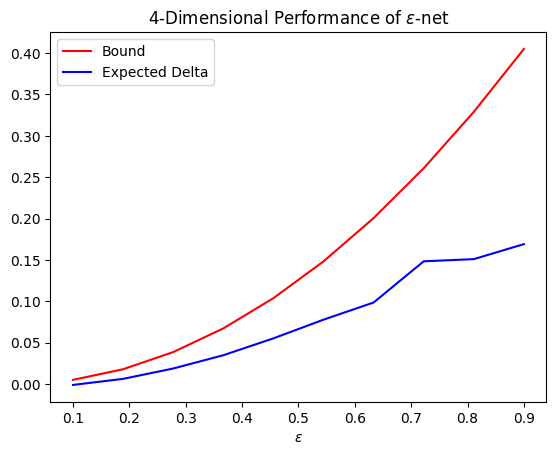

In [257]:
plt.plot(experiment_data['Epsilon'],experiment_data['Bound'],c='r',label='Bound')
plt.plot(experiment_data['Epsilon'],experiment_data['Delta'],c='b',label='Expected Delta')
plt.legend()
plt.title(f'{dim}-Dimensional Performance of $\epsilon$-net')
plt.xlabel(r'$\epsilon$')

Text(0.5, 0, '$\\epsilon$')

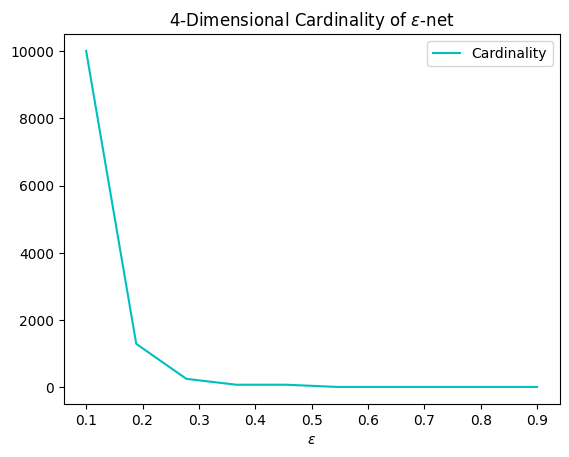

In [251]:
plt.plot(experiment_data['Epsilon'],experiment_data['Cardinality'],c='c',label='Cardinality')
plt.legend()
plt.title(f'{dim}-Dimensional Cardinality of $\epsilon$-net')
plt.xlabel(r'$\epsilon$')

In [89]:
net=Enet(5,0.9)
net.width_gap()

Generated epsilon-net with 347 points.
Generated 10000 points on the unit sphere.
Generated 10000 Gaussian samples.
Covariance matrix:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Average Delata:  0.09288033616193077
Upper bound:  0.905607530887415


In [59]:
net_points = net.generate_epsilon_net()
ball_points = net.generate_points_in_unit_ball(1000)
gaussian_samples, covariance_matrix = net.generate_gaussian_samples(10000)

Generated epsilon-net with 125 points.
Generated 1000 points on the unit sphere.
Generated 10000 Gaussian samples.
Covariance matrix:
 [[ 1.76352771 -0.16099419 -1.8943945 ]
 [-0.16099419  1.25379732  0.07647555]
 [-1.8943945   0.07647555  3.32850831]]


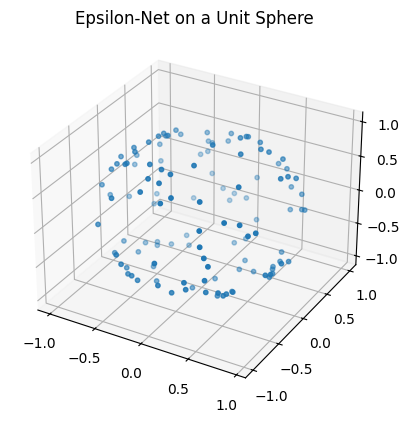

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(net_points[:, 0], net_points[:, 1], net_points[:, 2], s=10)
ax.set_title("Epsilon-Net on a Unit Sphere")
plt.show()

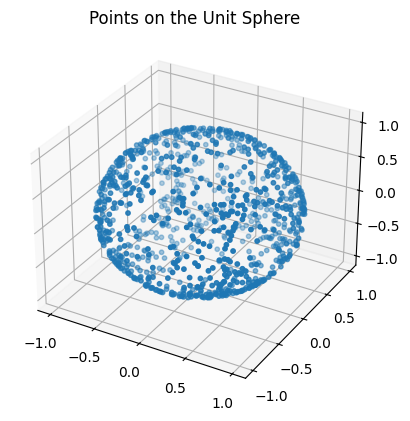

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ball_points[:, 0], ball_points[:, 1], ball_points[:, 2], s=10)
ax.set_title("Points on the Unit Sphere")
plt.show()

0.3867031546855545

In [60]:
width_ball=[]
for theta in gaussian_samples:
    width_ball.append(np.max(np.dot(ball_points,theta.reshape(3,1))))
print(np.average(width_ball))

2.220236996106242


In [61]:
width_net=[]
for theta in gaussian_samples:
    width_net.append(np.max(np.dot(net_points,theta.reshape(3,1))))
print(np.average(width_net))

2.1968060439903567


In [27]:
# Compute the difference and bound vectors
difference = [width_ball[i] - width_net[i] for i in range(num_samples)]
bound = [np.linalg.norm(gaussian_samples[i]) * epsilon for i in range(num_samples)]

# Convert lists to NumPy arrays for efficient processing
difference = np.array(difference)
bound = np.array(bound)

# Check if the condition holds for all rows
condition = np.abs(difference) < bound

# If you want to check if this condition is true for all rows
all_valid = np.all(condition)

# Print the results
print(f"Condition holds for all rows: {all_valid}")

Condition holds for all rows: True


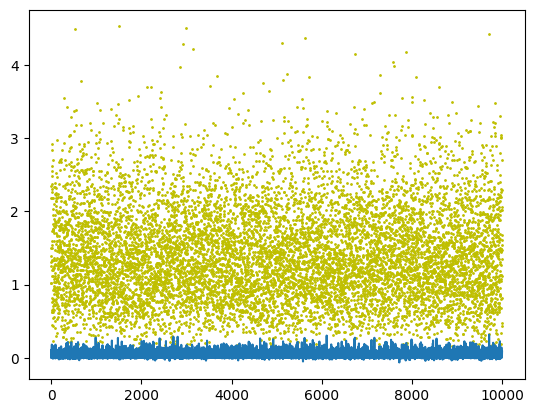

In [28]:
plt.scatter([*range(num_samples)],bound,s=1,c='y')
plt.plot([*range(num_samples)],difference)

(array([2.200e+01, 2.474e+03, 4.244e+03, 2.038e+03, 7.750e+02, 2.990e+02,
        9.400e+01, 3.600e+01, 1.400e+01, 4.000e+00]),
 array([-0.06475491, -0.02671491,  0.01132509,  0.0493651 ,  0.0874051 ,
         0.12544511,  0.16348511,  0.20152511,  0.23956512,  0.27760512,
         0.31564512]),
 <BarContainer object of 10 artists>)

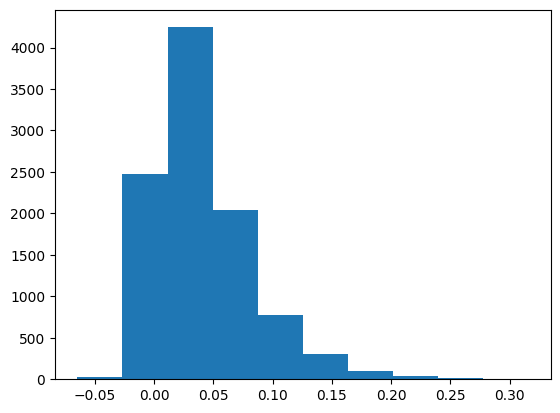

In [29]:
plt.hist(difference)

(array([1250., 2715., 2645., 1758.,  984.,  416.,  169.,   47.,   12.,
           4.]),
 array([0.02526495, 0.53425537, 1.04324579, 1.5522362 , 2.06122662,
        2.57021703, 3.07920745, 3.58819786, 4.09718828, 4.60617869,
        5.11516911]),
 <BarContainer object of 10 artists>)

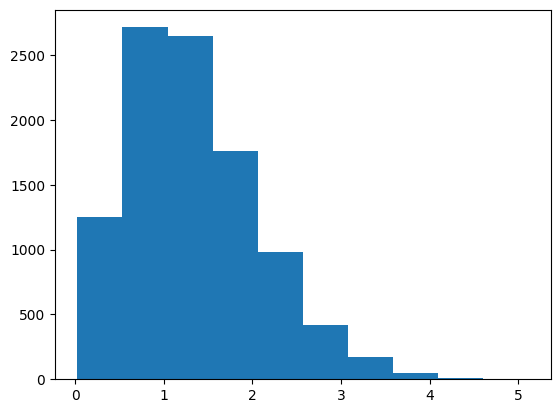

In [133]:
plt.hist(bound)